<a href="https://colab.research.google.com/github/caiochacon/ufpb_intro_cd/blob/main/Exerc%C3%ADcio_Caio_Lucas_Medidas_de_Centralidade_e_Dispers%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Medidas de Centralidade e Dispersão

A partir do dataset `movies.csv` calcule a média, mediana e desvio padrão para as colunas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yurimalheiros/icd/master/datasets/movies.csv')

In [3]:
df.head(1)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0


### US Gross

In [4]:
print('Média:', df['US Gross'].mean())
print('Mediana:', df['US Gross'].median())
print('Desvio padrão:', df['US Gross'].std())

Média: 44002085.163744524
Mediana: 22019465.5
Desvio padrão: 62555311.39066204


### Production Budget

In [5]:
print('Média:', df['Production Budget'].mean())
print('Mediana:', df['Production Budget'].median())
print('Desvio padrão:', df['Production Budget'].std())

Média: 31069171.4484375
Mediana: 20000000.0
Desvio padrão: 35585913.44464446


### Running Time

In [6]:
print('Média:', df['Running Time (min)'].mean())
print('Mediana:', df['Running Time (min)'].median())
print('Desvio padrão:', df['Running Time (min)'].std())

Média: 110.19354838709677
Mediana: 107.0
Desvio padrão: 20.171013677535424


### IMDB Rating

In [7]:
print('Média:', df['IMDB Rating'].mean())
print('Mediana:', df['IMDB Rating'].median())
print('Desvio padrão:', df['IMDB Rating'].std())

Média: 6.283467202141896
Mediana: 6.4
Desvio padrão: 1.2522899386004838


### IMDB Votes

In [8]:
print('Média:', df['IMDB Votes'].mean())
print('Mediana:', df['IMDB Votes'].median())
print('Desvio padrão:', df['IMDB Votes'].std())

Média: 29908.64457831325
Mediana: 15106.0
Desvio padrão: 44937.58233504965


### Análise dos Resultados

Quais colunas tiveram valores muito diferentes entre média e mediana? Quais os seus desvios padrão?

**RESPONDA AQUI**

As colunas que tiveram valores mais discrepantes de média e mediana foram:
- US Gross, com um desvio padrão de 62.555.311 dólares
- Production Budget, com um desvio padrão de 35.585.913 dólares
- IMDB Votes, com um desvio padrão de 44.837 votos

Que conclusões podemos tirar desses resultados?

**RESPONDA AQUI**

As duas colunas com o maior desvio padrão foram aquelas que se relacionam com o dinheiro. O lucro bruto nos EUA possui um desvio padrão de mais de 60 milhões (é muito dinheiro), enquanto o custo de produção, 35 milhões. Isso pode acontecer por causa do "monopólio" que existe no mundo dos filmes; isto é, as grandes empresas cinematograficas, que possuem mais condições financeiras, acabam distorcendo o valor real das coisas. Dessa forma, ao calcularmos a média, temos um valor muito maior do que a realidade mostra, pois temos alguns filmes com um custo de produção absurdo, e outros com bem menos. O mesmo vale para o lucro bruto nos Estados Unidos. Um exemplo claro disso é quando comparamos a média do US Gross com o filme que mais arrecadou e o que menos arrecadou: 


*Avatar* arrecadou 760 milhões de dólares

In [9]:
df.sort_values(by='US Gross', ascending=False)[:1][['Title', 'US Gross']]

,Title,US Gross
1234,Avatar,760167650.0


Enquanto o filme com menor a menor arrecadação foi *The Rise and Fall of Miss Thang*, com 401 dólares arrecadados.

Lembrando que não foram considerados os filmes com arrecadação nula.

In [10]:
df[df['US Gross'] > 0].sort_values(by='US Gross', ascending=False)[-1:][['Title', 'US Gross']]

,Title,US Gross
774,The Rise and Fall of Miss Thang,401.0


O primeiro filme arrecadou mais de 1,8 milhões de vezes mais que o ultimo, e a média de arrecadação foi de 44 milhões. 

A segunda coluna, Production Budget, também é afetada por essa discrepância citada acima. A tendência é que, quanto maior o custo de produção de um filme, maior seja o seu retorno. Claro que isso não é uma regra, mas vejamos os 10 filmes com mais lucro nos nossos dados:

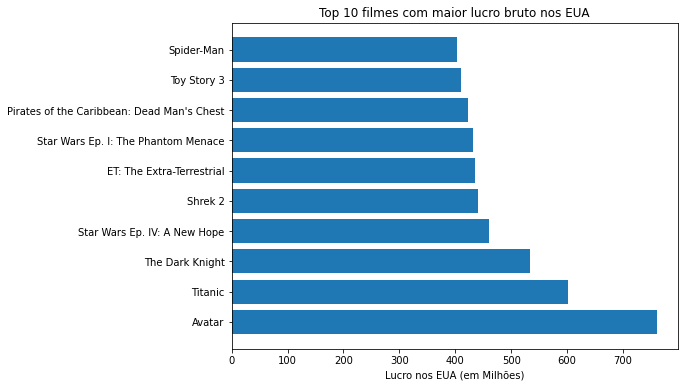

In [11]:
plt.figure(figsize=(8, 6))
plt.barh(df.sort_values(by='US Gross', ascending=False)[:10]['Title'], 
         df.sort_values(by='US Gross', ascending=False)[:10]['US Gross'].values / 1000000)
plt.title('Top 10 filmes com maior lucro bruto nos EUA')
plt.xlabel('Lucro nos EUA (em Milhões)')
plt.show()

E agora, os seus respectivos custos de produção:

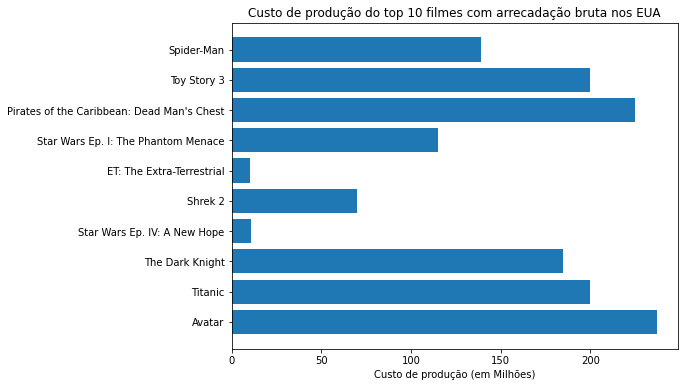

In [12]:
plt.figure(figsize=(8, 6))
plt.barh(df.sort_values(by='US Gross', ascending=False)[:10]['Title'], 
         df.sort_values(by='US Gross', ascending=False)[:10]['Production Budget'].values / 1000000)
plt.title('Custo de produção do top 10 filmes com arrecadação bruta nos EUA')
plt.xlabel('Custo de produção (em Milhões)')
plt.show()

Veja que dos 10 filmes que mais arrecadaram na história, apenas dois deles possuiam um custo de produção abaixo da média (31 milhões) e da mediana (20 milhões), o que reforça a tese da diferença.

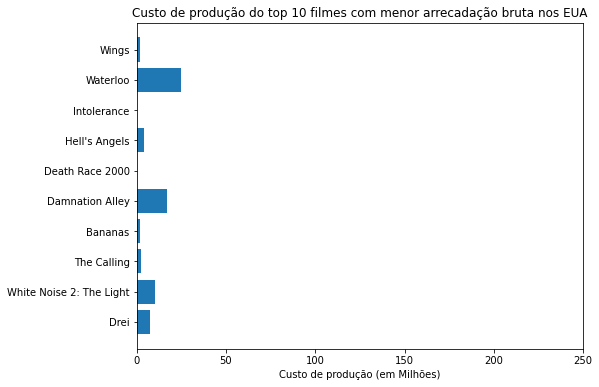

In [19]:
plt.figure(figsize=(8, 6))
plt.barh(df.sort_values(by='US Gross', ascending=False)[-10:]['Title'], 
         df.sort_values(by='US Gross', ascending=False)[-10:]['Production Budget'] / 1000000)
plt.title('Custo de produção do top 10 filmes com menor arrecadação bruta nos EUA')
plt.xlabel('Custo de produção (em Milhões)')
plt.xticks(np.arange(0, 300, 50))
plt.show()

A ultima coluna com um desvio padrão alto, IMDB Votes, pode ser um reflexo da discrepância mostrada acima, pois, quanto mais um filme arrecadou, mais ele teve pessoas o assistindo e, por consequência, a chance dele ter mais votos é maior. 

Sendo assim, vimos que as colunas com um maior desvio padrão denunciam os diferentes níveis da indústria cinematográfica: dos grandes sucessos das grandes produtoras até os desconhecidos filmes de produtoras independentes. 